reference:

https://www.kaggle.com/artemsolomko/video-games-sales-with-score-eda-and-stat-test

https://www.kaggle.com/zihaoxu/the-console-wars-ps-vs-xbox-vs-wii/notebook

# Predict Racing Video Game Sales 

0. Import libraries

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

Take a quick look what's inside data table.

In [8]:
game_df = pd.read_csv(r"C:\Users\N.PK\Documents\SERIOUS PROJECTS\Video_Games_Sales_as_at_22_Dec_2016.csv\Video_Games_Sales_as_at_22_Dec_2016.csv")
game_df[:7]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E


In [9]:
game_df.columns.to_list()

['Name',
 'Platform',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

### Data Description
- **Name** - the name of the game
- **Platform** - platform
- **Year_of_Release** - year of release
- **Genre** - game genre
- **Publisher** - studio
- **NA_sales** - North American sales (millions of copies sold)
- **EU_sales** - sales in Europe (millions of copies sold)
- **JP_sales** - sales in Japan (millions of copies sold)
- **Other_sales** - sales in other countries (millions of copies sold)
- **Global_sales** - sales in other countries (millions of copies sold)
- **Critic_Score** - Critic score (maximum 100)
- **Critic_count** - The number of critics used in coming up with the Criticscore
- **User_Score** - user score (maximum 10)
- **Rating** - rating from the organization [ESRB](https://www.esrb.org/) (English Entertainment Software Rating Board).
- **Developer** - developer

Look at the market focused on 'Racing' genre.

In [10]:
racing_df = game_df[game_df['Genre']=='Racing']
racing_df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
11,Mario Kart DS,DS,2005.0,Racing,Nintendo,9.71,7.47,4.13,1.90,23.21,91.0,64.0,8.6,464.0,Nintendo,E
28,Gran Turismo 3: A-Spec,PS2,2001.0,Racing,Sony Computer Entertainment,6.85,5.09,1.87,1.16,14.98,95.0,54.0,8.4,314.0,Polyphony Digital,E
40,Mario Kart 7,3DS,2011.0,Racing,Nintendo,5.03,4.02,2.69,0.91,12.66,85.0,73.0,8.2,632.0,"Retro Studios, Entertainment Analysis & Develo...",E
48,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.66,89.0,74.0,8.5,272.0,Polyphony Digital,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16634,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01,63.0,8.0,8.2,22.0,Milestone S.r.l,E
16637,SBK Superbike World Championship,PSP,2008.0,Racing,Black Bean Games,0.01,0.00,0.00,0.00,0.01,NaN,NaN,tbd,NaN,Milestone S.r.l,E10+
16662,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16690,Yattaman Wii: BikkuriDokkiri Machine de Mou Ra...,Wii,2008.0,Racing,Takara Tomy,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


we are working on times series so remove nulls.

In [11]:
racing_df['Year_of_Release'].isnull().sum()

23

In [12]:
racing_df.dropna(subset=['Year_of_Release'], inplace=True)
racing_df['Year_of_Release'].isnull().sum()

0

In [13]:
racing_data = racing_df[['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
racing_data = racing_data.set_index('Year_of_Release', drop=True)
racing_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
2008.0,15.68,12.76,3.79,3.29,35.52
2005.0,9.71,7.47,4.13,1.90,23.21
2001.0,6.85,5.09,1.87,1.16,14.98
2011.0,5.03,4.02,2.69,0.91,12.66
2004.0,3.01,0.01,1.10,7.53,11.66
...,...,...,...,...,...
2016.0,0.00,0.01,0.00,0.00,0.01
2008.0,0.01,0.00,0.00,0.00,0.01
2011.0,0.00,0.01,0.00,0.00,0.01


Now we have full data set.

Before model sees the data,
let's see the sales sequence if there is any pattern.

In [15]:
# Correctly group by 'Year_of_Release' and calculate the mean for the specified columns
game_data = game_data.groupby('Year_of_Release')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].mean()


In [16]:
game_data = game_data.iloc[:-2]
game_data

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year_of_Release,,,,,
1980.0,1.176667,0.074444,0.000000,0.013333,1.264444
1981.0,0.726087,0.042609,0.000000,0.006957,0.777609
1982.0,0.747778,0.045833,0.000000,0.008611,0.801667
1983.0,0.456471,0.047059,0.476471,0.008235,0.987647
1984.0,2.377143,0.150000,1.019286,0.050000,3.597143
1985.0,2.409286,0.338571,1.040000,0.065714,3.852857
1986.0,0.595238,0.135238,0.943333,0.091905,1.765238
1987.0,0.528750,0.088125,0.726875,0.012500,1.358750
1988.0,1.591333,0.439333,1.050667,0.066000,3.148000


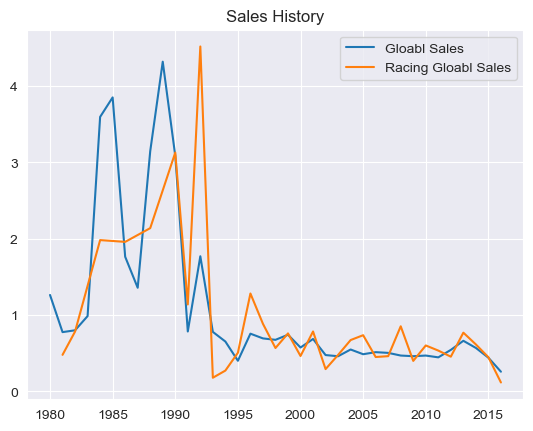

In [17]:
plt.plot(game_data.groupby('Year_of_Release')['Global_Sales'].mean(), label='Gloabl Sales')
plt.plot(racing_data.groupby('Year_of_Release')['Global_Sales'].mean(), label='Racing Gloabl Sales')
plt.legend()
plt.title('Sales History')
plt.show()

Globally, it is decreasing in sale.

Racing video game sale is slightly greater than or the similart to the global mean in hitory, in general.

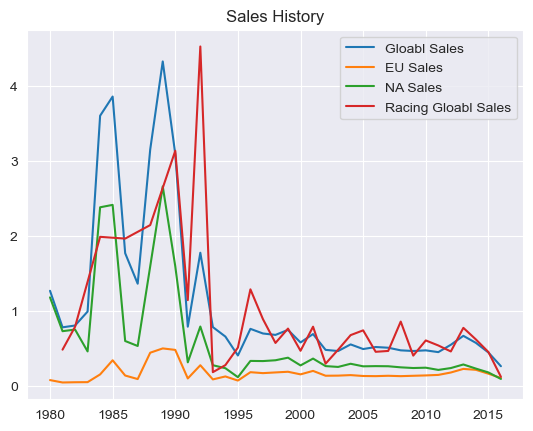

In [18]:
plt.plot(game_data.groupby('Year_of_Release')['Global_Sales'].mean(), label='Gloabl Sales')
plt.plot(game_data.groupby('Year_of_Release')['EU_Sales'].mean(), label='EU Sales')
plt.plot(game_data.groupby('Year_of_Release')['NA_Sales'].mean(), label='NA Sales')
plt.plot(racing_data.groupby('Year_of_Release')['Global_Sales'].mean(), label='Racing Gloabl Sales')
plt.legend()
plt.title('Sales History')
plt.show()

Racing video game sale is slightly greater than global sale.

What platform do users use?
I care about console so will look into that.

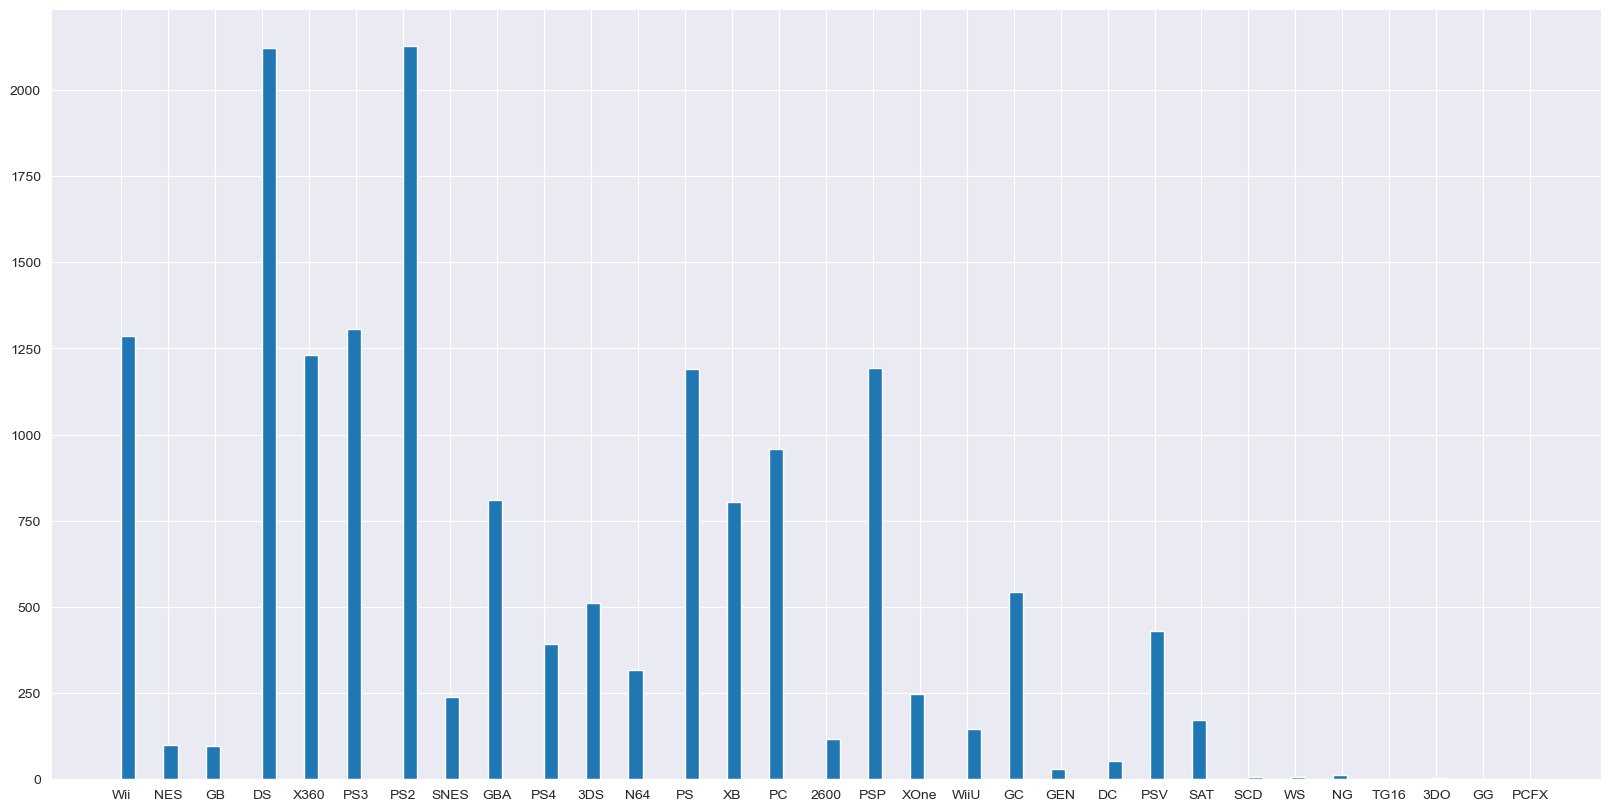

In [19]:
plt.figure(figsize=(20, 10))
plt.hist(game_df['Platform'], bins=100)
plt.show()

It is platform distirbution.
I will select console platform.

<Figure size 3500x1500 with 0 Axes>

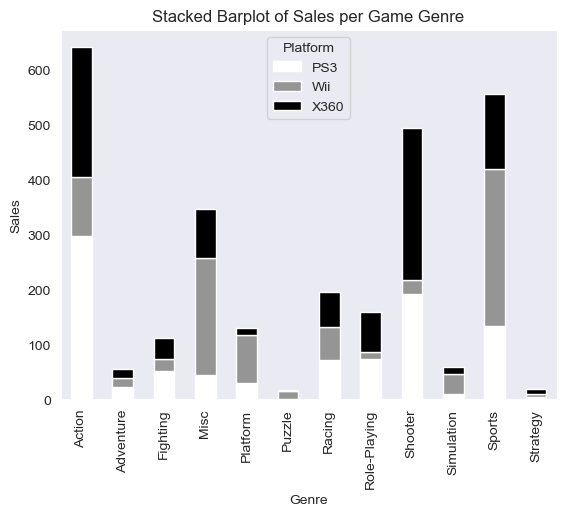

In [20]:
plt.figure(figsize=(35,15))

video7th = game_df[(game_df['Platform'] == 'Wii') | (game_df['Platform'] == 'PS3') | (game_df['Platform'] == 'X360')]

genreSales = video7th.groupby(['Genre','Platform']).Global_Sales.sum()
genreSales.unstack().plot(kind='bar',stacked=True,  colormap= 'Greys', grid=False)
plt.title('Stacked Barplot of Sales per Game Genre')
plt.ylabel('Sales')
plt.show()

## Observation:

1.No particular choice in console yet

In racing, the distribution of popular console is quite well spread.

In other genre, there are some particular choices of console.

Maybe, there's no particular flavor in terms of console platform when doing racing game.

2.Can continue to grow

In total of consol sales, it is middle class of sale volume.
It is not too low or not too blowed. It is placed where's good to grow.


## Conclusion:

1.Under the observation 1,

there's good place for new game changer, like Cart Rider of Nitro studio, to fit in.

2.Following obervation 2, 

there's potential for ongoing growth for racing vidoe game with console.

There should be more research on this, but it looks positive vision in this area.

We love old time items in fashion and song,everywhere now.

It is time for console game market to come into peopl's life.

# Dataset and feature selection

Who is leading gloal market?

<Axes: >

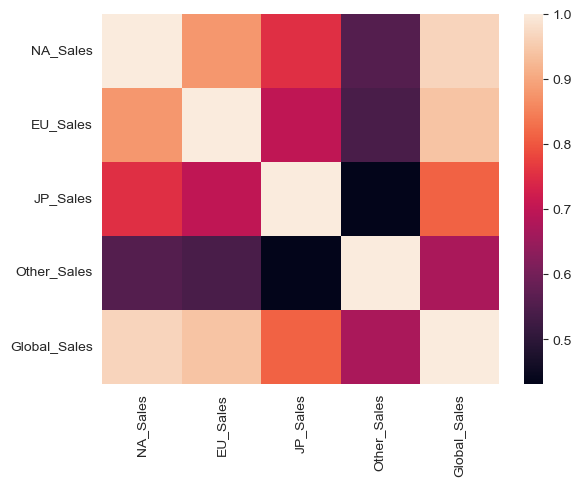

In [21]:
sns.heatmap(racing_data.corr())

North America and Europe are strong.

In [22]:
racing_data.corr()['Global_Sales']

NA_Sales        0.965370
EU_Sales        0.942135
JP_Sales        0.812064
Other_Sales     0.671075
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

Take both to predict global sale.

In [23]:
racing_ds = racing_data[['NA_Sales','EU_Sales', 'Global_Sales']].sort_index()
racing_ds

,NA_Sales,EU_Sales,Global_Sales
Year_of_Release,,,
1981.0,0.45,0.03,0.48
1982.0,0.37,0.02,0.39
1982.0,1.10,0.07,1.18
1984.0,0.26,0.01,0.27
1984.0,0.00,0.00,1.52
...,...,...,...
2016.0,0.03,0.00,0.04
2016.0,0.04,0.27,0.37
2016.0,0.00,0.04,0.04


In [24]:
racing_v = racing_ds.values
racing_v.shape

(1226, 3)

In [28]:
x_data = []
y_data = []
for i in range(len(racing_v)):
    #print(i)
    if i <= len(racing_v):
        x = racing_v[i][:2]
        y = racing_v[i][2]
        x_data.append(x)
        y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((1226, 2), (1226,))

In [29]:
racing_v[0], x_data[0]

(array([0.45, 0.03, 0.48]), array([0.45, 0.03]))

In [30]:
racing_v[0][:2]==x_data[0], racing_v[0][2] == y_data[0]

(array([ True,  True]), True)

In [31]:
train_test_split = 1150

x_train = x_data[:train_test_split]
y_train = y_data[:train_test_split]

x_val = x_data[train_test_split:]
y_val = y_data[train_test_split:]

In [32]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((1150, 2), (1150,), (76, 2), (76,))

## Modelling - prediction

In [33]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(x_train)
val_scaled = scaler.transform(x_val)

In [34]:
from sklearn.linear_model import BayesianRidge, LinearRegression

# Fit the Bayesian Ridge Regression and an OLS for comparison
clf =  LinearRegression()
clf.fit(x_train, y_train)
clf.score(x_val, y_val)

0.9929963561737511

score is very high. 

That's beacuse:

1.we luckily have storng correlated features to target value and can use them.

2.the number of feature is low reletativley those of examples.

3.with above support, we can use simple model and predict well with such a small data set.

## Further research

1.Can we predict future sales value with other fetures such as the proportion of 'Genre'?

2.Can find any relation 'Platform' and 'Genre'? Maybe use prefer the particular platform to the other platform for certain genre. Can we use those relations and predict console racing game sales future value or rating/score of users? 

Then, we can make a action plan in advance and react to the market changes properly.